### Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
from sklearn.linear_model import LinearRegression as linreg
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
plt.rcParams["figure.dpi"] = 150

### Loading the Dataset

In [ ]:
def load_dataset(src_dir: str):
  """
  Load the dataset as a set of numpy arrays

  Args:
  src_dir (str): Directory where the dataset files are stored
  
  Returns:
  (x_train, y_train, x_val, y_val, x_test) tuple where each array is one dimensional
  
  """

  x_train = np.loadtxt(os.path.join(src_dir, 'x_train.txt'))
  y_train = np.loadtxt(os.path.join(src_dir, 'y_train.txt'))
  x_val = np.loadtxt(os.path.join(src_dir, 'x_val.txt'))
  y_val = np.loadtxt(os.path.join(src_dir, 'y_val.txt'))
  x_test = np.loadtxt(os.path.join(src_dir, 'x_test.txt'))

  return x_train, y_train, x_val, y_val, x_test

In [ ]:
src_dir = '/content/drive/MyDrive/University Notebooks/EN4553 - Machine Vision/Assignment_3/180497C'
x_train, y_train, x_val, y_val, x_test = load_dataset(src_dir)

### Visualizing the Datasets

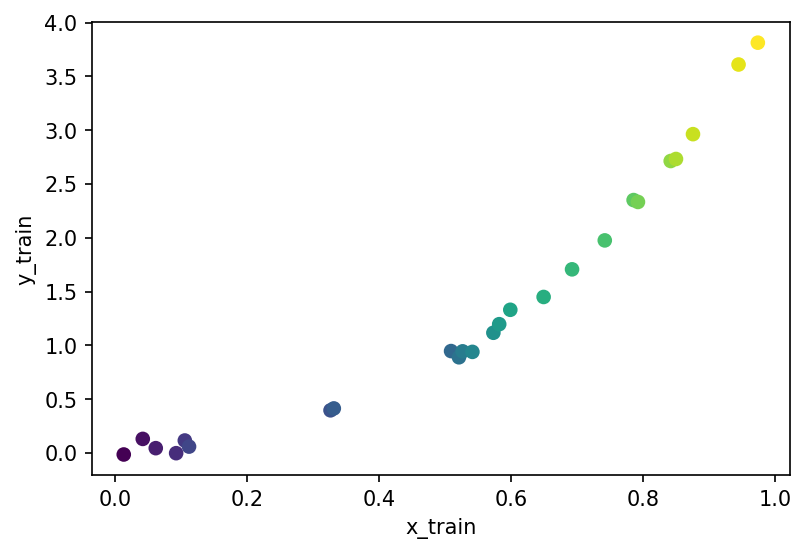

In [ ]:
train_data = pd.DataFrame({'x_train':x_train, 'y_train':y_train})
train_data.sort_values('x_train', inplace=True)

colors_train = np.array([range(0,100,4)])

plt.scatter(train_data['x_train'], train_data['y_train'], c = colors_train, cmap = 'viridis')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.savefig('Train_data.png')

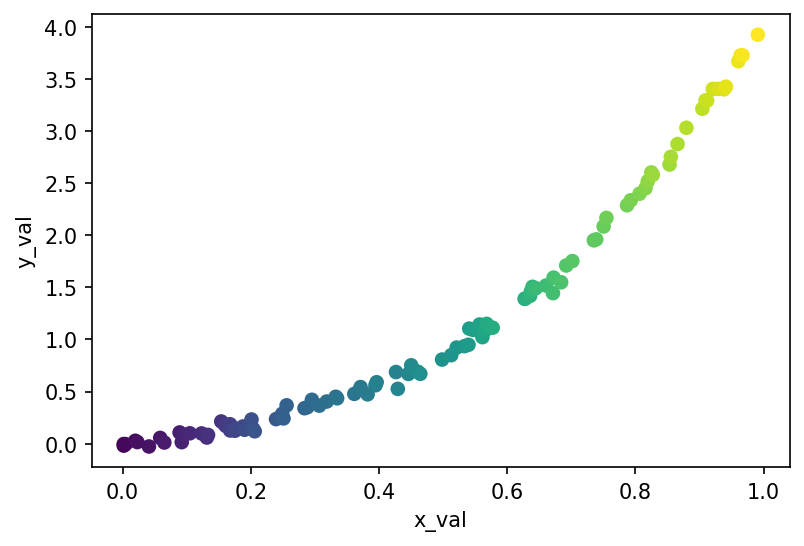

In [ ]:
val_data = pd.DataFrame({'x_val':x_val, 'y_val':y_val})
val_data.sort_values('x_val', inplace=True)

colors_val = np.array([range(0,100)])

plt.scatter(val_data['x_val'], val_data['y_val'], c = colors_val, cmap = 'viridis')
plt.xlabel('x_val')
plt.ylabel('y_val')
plt.savefig('Val_data.png')

### Getting Features

In [ ]:
def get_features(x: np.ndarray, n: int):

  """
  Creates n-th degree polynomial features for the given vector x
  Example usage:
  get_features(np.array([1.0, 2.0, 3.0]), 3) outputs
  np.array([[ 1., 1., 1.],
  [ 2., 4., 8.],
  [ 3., 9., 27.]])

  Args:
  x: A numpy array of shape (num_examples, ) or (num_examples, 1)
  n: The degree of the polynomial features

  Returns:
  A matrix of shape (num_examples, n) where the j-th column is equal to
  the vector x raised, elementwise, to the power j

  """
  input_features = np.array([i**(j + 1)  for i in x for j in range(n)])
  input_features = np.reshape(input_features, (x.shape[0], n))
  return input_features

### Fit and Evaluate

In [ ]:
def fit_and_evaluate(x_train: np.ndarray, y_train: np.ndarray, x_val: np.ndarray, y_val: np.ndarray, n: int):
  """
  Fits an n-th degree polynomial and outputs train and validation MSE
  Fits a linear regression model y = sum_{i=1}^n w_i x^i to the given train
  set and outputs the mean-squared-error (MSE) on train and validation sets

  Args:
  x_train: Input features for the train set. Has shape (num_train, )
  y_train: Targets (labels) for the train set. Has shape (num_train, )
  x_val: Input features for the validation set. Has shape (num_val, )
  y_val: Targets (labels) for the validation set. Has shape (num_val, )
  n: The degree of the polynomial fit. See the above equation

  Returns:
  (train_mse, val_mse), tuple of MSE on train and validation sets.
  
  """
  # Fit the model on the train set.
  input_features_train = get_features(x_train, n)
  reg_model = linreg(fit_intercept = False).fit(input_features_train, y_train)

  # Generate model predictions for the train set and calculate the MSE.
  y_predict_train = reg_model.predict(input_features_train)
  y_diff_train = y_predict_train - y_train
  train_mse = np.dot(y_diff_train, y_diff_train)/(2*y_diff_train.shape[0])
  
  # Similarly, calculate the MSE on the val set.
  input_features_val = get_features(x_val, n)
  y_predict_val = reg_model.predict(input_features_val)
  y_diff_val = y_predict_val - y_val
  val_mse = np.dot(y_diff_val, y_diff_val)/(2*y_diff_val.shape[0])

  return train_mse, val_mse

### Selecting the Best 'n'

In [ ]:
degrees = range(1,11)
mse_array = np.zeros([10,2])
for degree in degrees:
  mse_array[degree-1,:] = fit_and_evaluate(x_train, y_train, x_val, y_val, degree)

In [ ]:
mse_array

array([[0.10551086, 0.10926324],
       [0.00256121, 0.00399264],
       [0.0009156 , 0.00123537],
       [0.00091463, 0.00123039],
       [0.00091133, 0.00120407],
       [0.00089505, 0.00125985],
       [0.00088083, 0.00139164],
       [0.00080767, 0.00145661],
       [0.00080688, 0.00153468],
       [0.00079309, 0.00134758]])

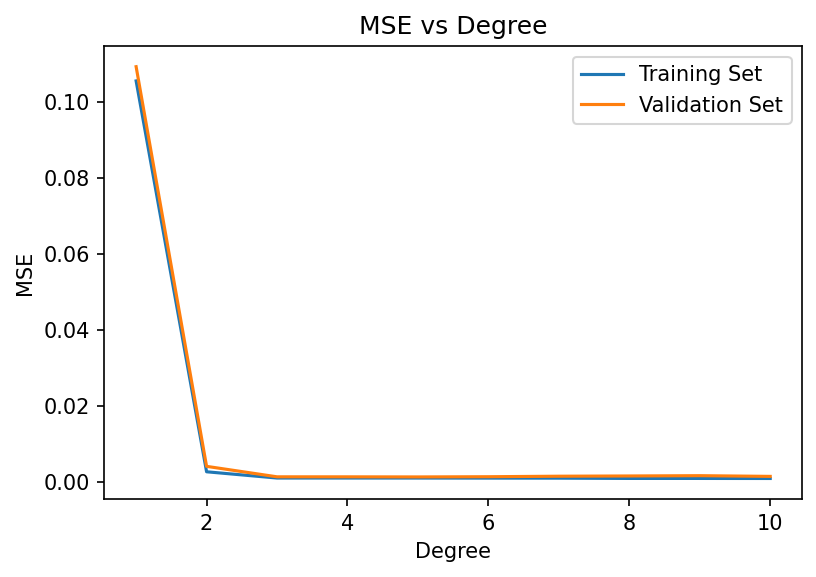

In [ ]:
plt.plot(degrees, mse_array[:, 0], linewidth = 1.5)
plt.plot(degrees, mse_array[: ,1], linewidth = 1.5)
plt.title('MSE vs Degree')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend(['Training Set', 'Validation Set'])
plt.savefig('MSE_vs_Degree.png')

### Regression Model with Degree 5 (No Intercept)

In [ ]:
degree = 5
# Getting predictions for train data (Just for visualization purposes)
input_features_train_5 = get_features(x_train, degree)
reg_model_degree_5 = linreg(fit_intercept = False).fit(input_features_train_5, y_train)
y_predict_train = reg_model_degree_5.predict(input_features_train_5)

In [ ]:
# Getting predictions for validation data (Just for visualization purposes)
input_features_val_5 = get_features(x_val, degree)
y_predict_val = reg_model_degree_5.predict(input_features_val_5)

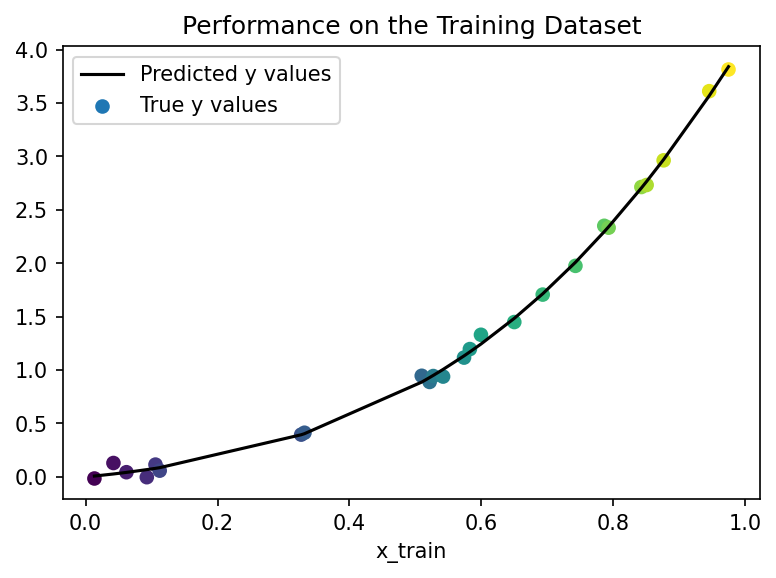

In [ ]:
# Visualizing the results
train_data_predicted = pd.DataFrame({'x_train':x_train, 'y_predict_train':y_predict_train})
train_data_predicted.sort_values('x_train', inplace=True)

colors_train = np.array([range(0,100,4)])

plt.scatter(train_data['x_train'], train_data['y_train'], c = colors_train, cmap = 'viridis')
plt.plot(train_data_predicted['x_train'], train_data_predicted['y_predict_train'], 'k')
plt.xlabel('x_train')
plt.legend(['Predicted y values', 'True y values'])
plt.title('Performance on the Training Dataset')
plt.savefig('Performance on the training dataset.png')

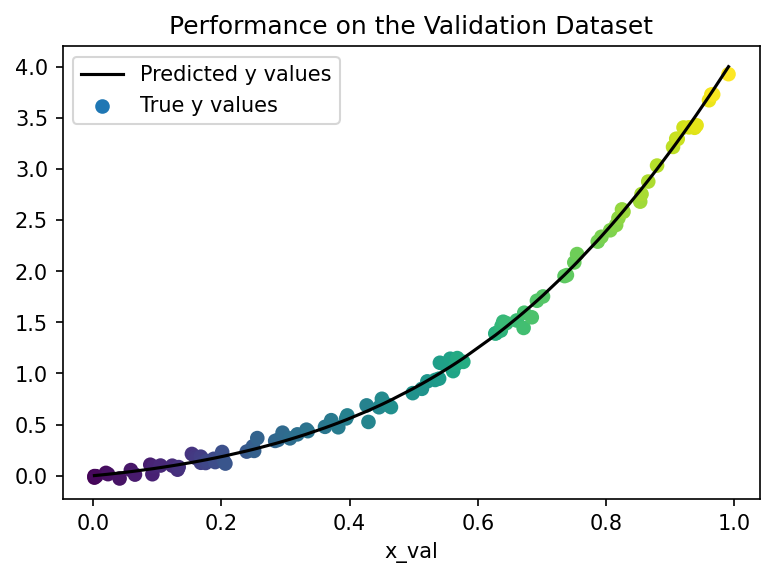

In [ ]:
# Visualizing the results
val_data_predicted = pd.DataFrame({'x_val':x_val, 'y_predict_val':y_predict_val})
val_data_predicted.sort_values('x_val', inplace=True)

colors_val = np.array([range(0,100)])

plt.scatter(val_data['x_val'], val_data['y_val'], c = colors_val, cmap = 'viridis')
plt.plot(val_data_predicted['x_val'], val_data_predicted['y_predict_val'], 'k')
plt.xlabel('x_val')
plt.legend(['Predicted y values', 'True y values'])
plt.title('Performance on the Validation Dataset')
plt.savefig('Performance on the validation dataset.png')

### Running Inference 

In [ ]:
input_features_test_5 = get_features(x_test , degree)
y_predict_test = reg_model_degree_5.predict(input_features_test_5)

In [ ]:
y_predict_test

array([9.42512815e-02, 1.36360200e-01, 1.06082657e+00, 5.83456396e-01,
       6.83414024e-02, 5.15980104e-01, 2.40745942e-01, 1.09579868e+00,
       1.15814241e-01, 1.11746125e+00, 4.41756014e-02, 2.39936777e-01,
       7.57582570e-01, 5.27931788e-01, 2.49558675e+00, 6.24327774e-01,
       2.39237918e-01, 7.02651655e-01, 3.58539206e-01, 3.08443965e-01,
       2.96150559e-01, 2.57604528e+00, 2.19472831e-01, 9.31584186e-02,
       2.70693677e+00, 3.09111657e+00, 4.74792866e-01, 1.94189122e-01,
       3.91916227e+00, 6.11612761e-01, 1.50504191e+00, 2.17682635e+00,
       2.13270545e+00, 9.09138817e-01, 1.76158360e-01, 1.16068028e-01,
       9.97573284e-02, 6.75309155e-01, 3.04922253e-01, 1.90035593e-01,
       6.63932491e-01, 1.86635933e+00, 1.16156001e+00, 3.34894555e-01,
       3.59909041e+00, 2.72204435e+00, 9.45272116e-01, 2.10050788e+00,
       3.73991151e+00, 1.69476208e-02, 5.20363997e-01, 2.26616992e-01,
       6.98307549e-01, 1.14712617e+00, 7.83301969e-01, 2.25794253e-01,
      

In [ ]:
np.savetxt('180497C_y_predict_test.txt', y_predict_test)

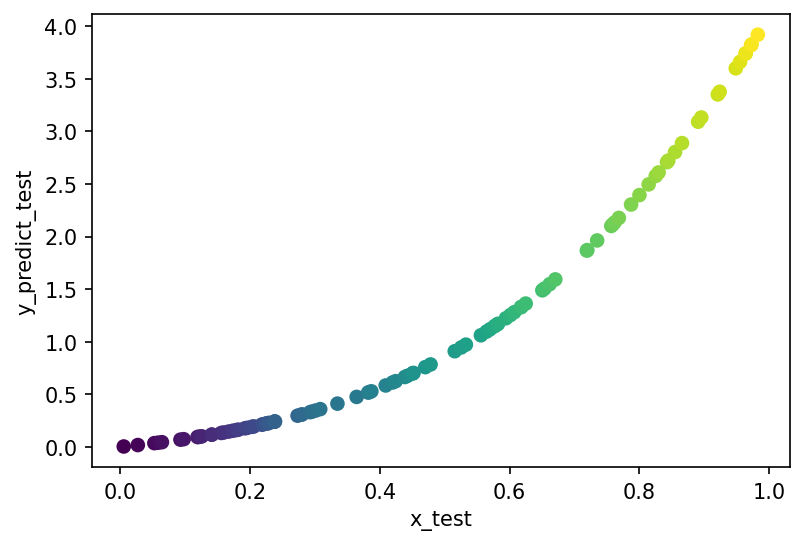

In [ ]:
# Visualizing the results
test_data_predicted = pd.DataFrame({'x_test':x_test, 'y_predict_test':y_predict_test})
test_data_predicted.to_csv('inference.csv', index = False)
test_data_predicted.sort_values('x_test', inplace=True)

colors_test = np.array([range(0,100)])

plt.scatter(test_data_predicted['x_test'], test_data_predicted['y_predict_test'], c = colors_test, cmap = 'viridis')
plt.xlabel('x_test')
plt.ylabel('y_predict_test')
plt.savefig('Test_data.png')